In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# -----------------------------
# Load data
# -----------------------------
file_path = 'C:/Users/sajad/Desktop/sudoku/split_digits.csv'
df = pd.read_csv(file_path)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80
0,8,6,4,3,7,1,2,5,9,3,...,4,5,4,2,9,1,6,3,7,8
1,3,4,6,1,7,9,2,5,8,1,...,2,2,5,4,3,9,7,1,8,6
2,6,9,5,1,2,7,3,8,4,1,...,3,5,6,2,3,4,8,1,9,7
3,4,9,7,2,5,8,3,1,6,1,...,4,5,3,4,8,9,7,2,6,1
4,4,6,5,9,1,2,3,7,8,1,...,3,8,9,1,7,3,6,4,2,5


In [23]:
# # randomly select one clumn index for each record
# replace_col = np.random.choice(df.shape[1],size=len(df))

# # Randomly select one column to replace the value with zero and save the replaced value in 'y' column
# for i, col_idx in enumerate(replace_col):
#     df.at[i, 'y'] = df.iat[i, col_idx]
#     df.iat[i, col_idx] = 0

# df.to_csv('C:/Users/sajad/Desktop/sudoku/sudoku_1_missing_y.csv')

In [24]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x72,x73,x74,x75,x76,x77,x78,x79,x80,y
0,8,6,4,3,7,1,2,5,9,3,...,5,4,2,9,1,6,3,7,8,2.0
1,3,4,6,1,7,9,2,5,8,1,...,2,5,4,3,9,7,1,8,6,1.0
2,6,9,5,1,2,7,3,8,4,1,...,5,6,2,3,4,8,1,9,7,9.0
3,4,9,7,2,5,8,3,1,6,1,...,5,3,4,8,9,7,2,6,1,2.0
4,4,6,5,9,1,2,3,7,8,1,...,8,9,1,7,3,6,4,2,5,1.0


In [25]:
# assign X features and y target values 
X = df[[f'x{i}' for i in range(81)]].values
y = df['y'].values

In [29]:
X.shape

(1000000, 81)

In [28]:
# as there are missing values among the x features we need to create one_hot mask for position of the missing value
#missing values are market as 0 in df
mask = (X==0).astype(int)  # when ever X is zero assing 1
#mask[0,:]


In [31]:
# now we need to concatenate these mask data into our df 
# masking help the NN model to predict just the missing value
x_masked = np.concatenate([X,mask] , axis = 1)
x_masked.shape

(1000000, 162)

In [33]:
#---------------------------------
# Train-test split
#---------------------------------
x_train, x_val, y_train, y_val = train_test_split(x_masked, y, test_size = 0.20 , random_state = 50)

In [36]:
print('x_train:',x_train.shape) 
print('x_val:',x_val.shape) 
print('y_train:',y_train.shape) 
print('y_val:',y_val.shape)

x_train: (800000, 162)
x_val: (200000, 162)
y_train: (800000,)
y_val: (200000,)


In [51]:
#---------------------------------
# Build the model
#---------------------------------
number_of_classes = len(np.unique(y))
model = models.Sequential([
    layers.Input(shape = (x_train.shape[1],)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(number_of_classes,  activation = 'softmax')
])

In [52]:
model.compile ( optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [53]:
#---------------------------------
# Train the model
#---------------------------------
history = model.fit(
                    x_train , y_train - 1, #split labels to range 0-8
                    epochs = 5 ,
                    batch_size = 256,
                    validation_data = (x_val, y_val -1)  
                   )

Epoch 1/5
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2398 - accuracy: 0.1150 - val_loss: 2.1995 - val_accuracy: 0.1157
Epoch 2/5
3125/3125 [==============================] - 12s 4ms/step - loss: 1.9943 - accuracy: 0.2373 - val_loss: 1.6227 - val_accuracy: 0.4562
Epoch 3/5
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3858 - accuracy: 0.6117 - val_loss: 1.1930 - val_accuracy: 0.7490
Epoch 4/5
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0586 - accuracy: 0.8694 - val_loss: 0.9432 - val_accuracy: 0.9733
Epoch 5/5
3125/3125 [==============================] - 14s 4ms/step - loss: 0.8550 - accuracy: 0.9662 - val_loss: 0.7779 - val_accuracy: 0.9947


In [54]:
#---------------------------------
# Evaluate the model
#---------------------------------
y_pred_class_probability = model.predict(x_val)
y_pred = np.argmax(y_pred_class_probability , axis =1 ) +1 # shift back to range 1-9
# Accuuracy
acc = accuracy_score(y_val,y_pred)
print(f'\naccuracy result: {acc}')

6250/6250 [==============================] - 11s 2ms/step

accuracy result: 0.994655


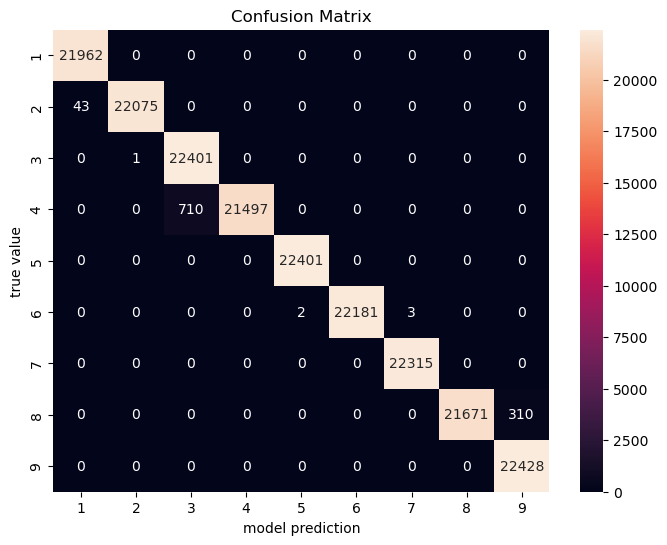

In [55]:
#---------------------------------
# Confusion matrix
#---------------------------------
Confusion = confusion_matrix(y_val,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(Confusion, annot = True, fmt = 'd',xticklabels=np.arange(1,10), yticklabels=np.arange(1,10))
plt.xlabel('model prediction')
plt.ylabel('true value')
plt.title('Confusion Matrix')
plt.show()

In [56]:
#classification report
print(classification_report(y_val,y_pred,digits=4))

              precision    recall  f1-score   support

         1.0     0.9980    1.0000    0.9990     21962
         2.0     1.0000    0.9981    0.9990     22118
         3.0     0.9693    1.0000    0.9844     22402
         4.0     1.0000    0.9680    0.9838     22207
         5.0     0.9999    1.0000    1.0000     22401
         6.0     1.0000    0.9998    0.9999     22186
         7.0     0.9999    1.0000    0.9999     22315
         8.0     1.0000    0.9859    0.9929     21981
         9.0     0.9864    1.0000    0.9931     22428

    accuracy                         0.9947    200000
   macro avg     0.9948    0.9946    0.9947    200000
weighted avg     0.9948    0.9947    0.9947    200000



In [57]:
#---------------------------------
# check single input prediction
#---------------------------------
def single_value_check( x , y , idx):
    input_x = np.array (x[idx]).reshape(-1,162)
    result = np.argmax(model.predict(input_x),axis=1) +1 # shift back to range 1-9
    print (f'y-lable {y[idx]}  Vs.',f'Predicted {result}')

In [60]:
single_value_check( x_val , y_val , idx=15)

1/1 [==============================] - 0s 46ms/step
y-lable 7.0  Vs. Predicted [7]
